Fichier trouve : data/animes.csv

TOP 5 RECOMMANDATIONS :


,Anime,Score_Final,Categorie
21,Steins;Gate,8.98,Chef-d'oeuvre
43,Your Lie in April,8.96,Chef-d'oeuvre
35,Frieren: Beyond Journey's End,8.91,Chef-d'oeuvre
13,Les Carnets de l'apothicaire,8.89,Chef-d'oeuvre
67,Oshi no Ko,8.88,Chef-d'oeuvre


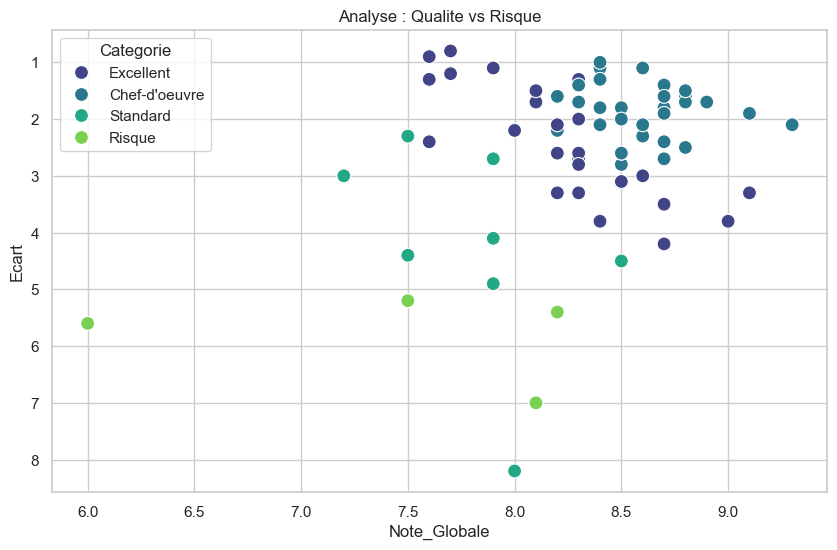

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

chemins_possibles = [
    'data/animes.csv',
    '../data/animes.csv',
    'animes.csv'
]

fichier_trouve = None
for chemin in chemins_possibles:
    if os.path.exists(chemin):
        fichier_trouve = chemin
        break

if fichier_trouve:
    print(f"Fichier trouve : {fichier_trouve}")
    df = pd.read_csv(fichier_trouve)
else:
    print("Erreur : Fichier animes.csv introuvable")
    raise FileNotFoundError("Fichier introuvable")

df_clean = df.copy()
df_clean['Note_Pire_Ep'] = df_clean['Note_Pire_Ep'].fillna(0)
df_clean['Nb_Episodes'] = pd.to_numeric(df_clean['Nb_Episodes'], errors='coerce').fillna(12)

df_clean['Ecart'] = df_clean['Note_Meilleur_Ep'] - df_clean['Note_Pire_Ep']
df_clean['Regularite'] = (10 - df_clean['Ecart']).clip(0, 10)

df_clean['Score_Final'] = (
    0.40 * df_clean['Note_Globale'] + 
    0.30 * df_clean['Regularite'] + 
    0.30 * df_clean['Note_Meilleur_Ep']
)

def donner_categorie(row):
    if row['Score_Final'] >= 8.5 and row['Regularite'] >= 7: return "Chef-d'oeuvre"
    elif row['Score_Final'] >= 8.0: return "Excellent"
    elif row['Note_Meilleur_Ep'] >= 9.0 and row['Regularite'] < 5: return "Risque"
    elif row['Score_Final'] < 6.0: return "A Eviter"
    else: return "Standard"

df_clean['Categorie'] = df_clean.apply(donner_categorie, axis=1)

print("\nTOP 5 RECOMMANDATIONS :")
display(df_clean.sort_values('Score_Final', ascending=False).head(5)[['Anime', 'Score_Final', 'Categorie']])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Note_Globale', y='Ecart', hue='Categorie', palette='viridis', s=100)
plt.title("Analyse : Qualite vs Risque")
plt.gca().invert_yaxis()
plt.show()

Dataset chargé : data/animes.csv
Fichier 'resultat_projet.csv' sauvegardé.


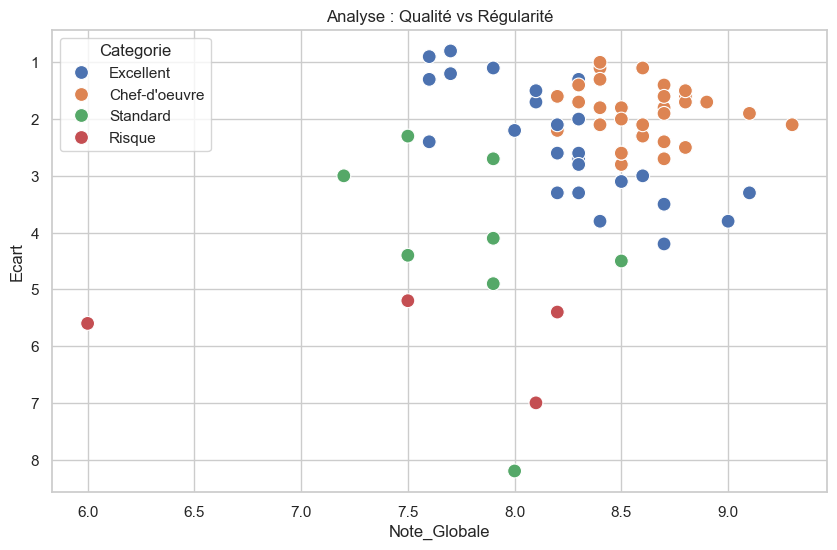

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. CHARGEMENT DES DONNÉES ---
# Je vérifie si le fichier est dans un sous-dossier ou à la racine
chemins = ['data/animes.csv', 'animes.csv']
fichier = None

for c in chemins:
    if os.path.exists(c):
        fichier = c
        break

if fichier:
    df = pd.read_csv(fichier)
    print(f"Dataset chargé : {fichier}")
else:
    print("Erreur : Impossible de trouver animes.csv")

# --- 2. NETTOYAGE ET CALCULS ---
df_clean = df.copy()


df_clean['Note_Pire_Ep'] = df_clean['Note_Pire_Ep'].fillna(0)
df_clean['Nb_Episodes'] = pd.to_numeric(df_clean['Nb_Episodes'], errors='coerce').fillna(12)


df_clean['Ecart'] = df_clean['Note_Meilleur_Ep'] - df_clean['Note_Pire_Ep']


df_clean['Regularite'] = (10 - df_clean['Ecart']).clip(0, 10)


df_clean['Score_Final'] = (
    0.40 * df_clean['Note_Globale'] + 
    0.30 * df_clean['Regularite'] + 
    0.30 * df_clean['Note_Meilleur_Ep']
)

# Fonction de classification
def definir_categorie(row):
    if row['Score_Final'] >= 8.5 and row['Regularite'] >= 7:
        return "Chef-d'oeuvre"
    elif row['Score_Final'] >= 8.0:
        return "Excellent"
    elif row['Note_Meilleur_Ep'] >= 9.0 and row['Regularite'] < 5:
        return "Risque"
    elif row['Score_Final'] < 6.0:
        return "A Eviter"
    else:
        return "Standard"

df_clean['Categorie'] = df_clean.apply(definir_categorie, axis=1)

# --- 3. EXPORT DES RÉSULTATS ---
df_clean.to_csv('resultat_projet.csv', index=False, encoding='utf-8-sig')
print("Fichier 'resultat_projet.csv' sauvegardé.")

# --- 4. VISUALISATION PRINCIPALE ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Note_Globale', y='Ecart', hue='Categorie', s=100)

plt.title("Analyse : Qualité vs Régularité")
plt.gca().invert_yaxis() # Pour mettre les faibles écarts (meilleurs) en haut

plt.savefig('graphique_analyse.png') # Sauvegarde l'image pour le rapport
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Note_Globale', y='Ecart', hue='Categorie', palette='viridis', s=100)
plt.title("Analyse Finale : Qualité vs Risque")
plt.gca().invert_yaxis()


plt.savefig('graphique_analyse.png')
print(" Image sauvegardée !")

# Création et sauvegarde de l'image du graphique
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Note_Globale', y='Ecart', hue='Categorie', palette='viridis', s=100)
plt.title("Analyse Finale : Qualité vs Risque")
plt.gca().invert_yaxis()

# Sauvegarde
plt.savefig('graphique_analyse.png')
print(" Image sauvegardée !")

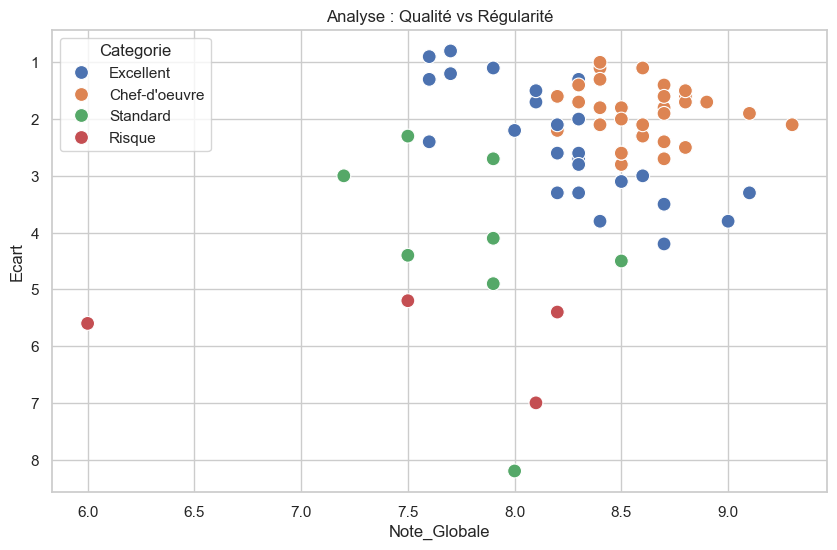

In [9]:

# --- GRAPHIQUE PRINCIPAL ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Note_Globale', y='Ecart', hue='Categorie', s=100)

plt.title("Analyse : Qualité vs Régularité")
# J'inverse l'axe Y car un petit écart est meilleur
plt.gca().invert_yaxis()

plt.savefig('graphique_analyse.png')
plt.show()

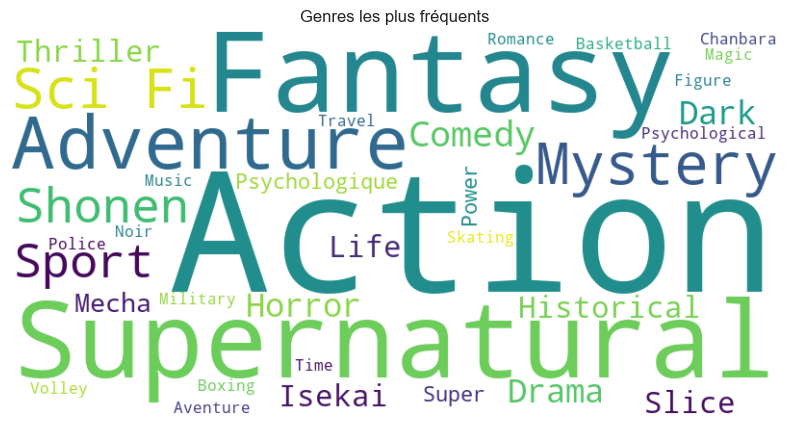

--- Stats ---
Nombre d'animés : 73
Moyenne Globale : 8.3
Moyenne Meilleur Ep : 9.31

--- Catégories ---
Categorie
Chef-d'oeuvre    32
Excellent        29
Standard          8
Risque            4
Name: count, dtype: int64


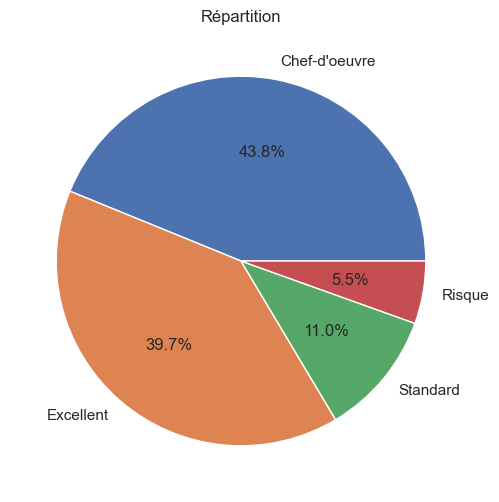

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Nuage de mots pour les Genres
text = " ".join(str(x) for x in df_clean['Genre_Tags'])

# Création du nuage
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

# Affichage
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Genres les plus fréquents")
plt.savefig('wordcloud_genres.png')
plt.show()

# 2. Statistiques (EDA)
print("--- Stats ---")
print("Nombre d'animés :", len(df_clean))
print("Moyenne Globale :", round(df_clean['Note_Globale'].mean(), 2))
print("Moyenne Meilleur Ep :", round(df_clean['Note_Meilleur_Ep'].mean(), 2))

# 3. Répartition des catégories
print("\n--- Catégories ---")
compte = df_clean['Categorie'].value_counts()
print(compte)

# Graphique Camembert
plt.figure(figsize=(6, 6))
compte.plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title("Répartition")
plt.savefig('repartition_categories.png')
plt.show()